In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [9]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [11]:
user_data.shape

(2954, 3)

In [13]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [5]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [8]:
logs.shape

(4500, 4)

In [15]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [14]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [6]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [16]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [40]:
best_clients = logs.groupby('client', as_index=False) \
    .agg({'success' : 'sum'}) \
    .sort_values('success', ascending=False) \
    .query('success ==success.max() ') \
    .reset_index() \
    .sort_values('client')
best_clients
id_best_clients = best_clients['client'].tolist()
id_best_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [47]:
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [100]:
data = user_data.merge(logs, on='client')
data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [82]:
data.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

C:\Users\ALEXEY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ALEXEY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

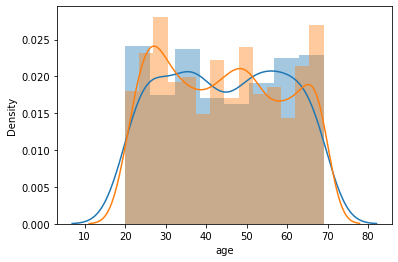

In [99]:
sns.distplot(data.query('premium == True').age)
sns.distplot(data.query('premium == False').age)

In [107]:
new_data = data \
    .groupby('client') \
    .agg({'success': 'sum'})
new_data

,success
client,
40,1
75,1
81,1
132,1
164,1
...,...
99926,1
99927,1
99931,1


C:\Users\ALEXEY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

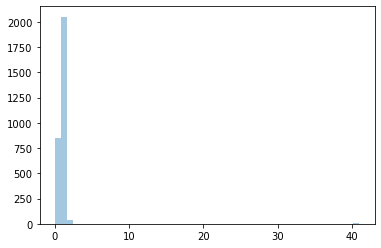

In [112]:
sns.distplot(new_data, kde=False)

In [124]:
age_to_success = data.query('platform == "computer"') \
    .groupby('age',as_index=False) \
    .agg({'success': 'sum'})


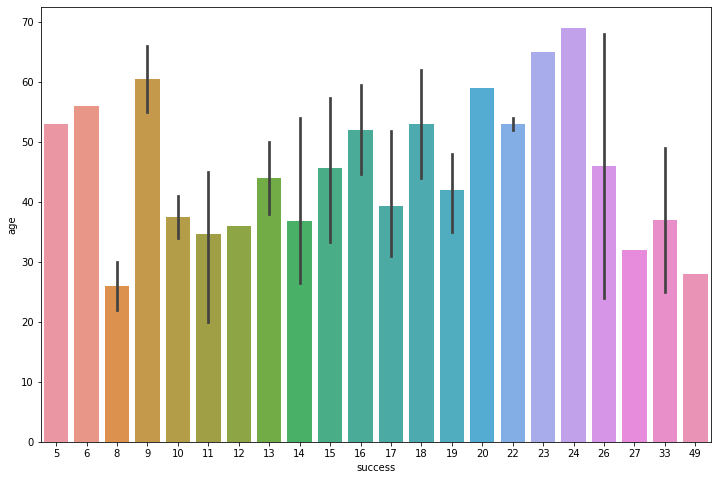

In [128]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(y = 'age', x = 'success', data = age_to_success)

C:\Users\ALEXEY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

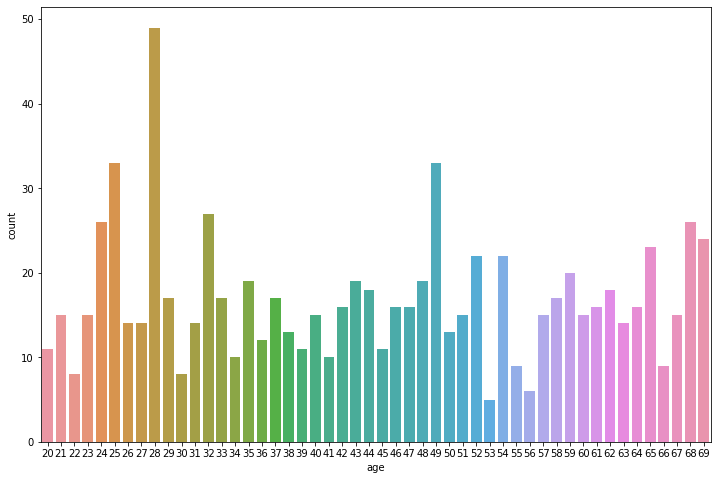

In [131]:
comp_success = data.query('platform == "computer" and success == True')
plt.figure(figsize=(12, 8))
sns.countplot(comp_success.age)